In [97]:
# Uncomment if you need to install:
# !pip install pymysql sqlalchemy pandas python-dotenv pandoc

In [98]:
from Utils import setup_database_connection
from Utils import load_all_players
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

engine = setup_database_connection()
player_data = load_all_players(engine)

Connecting to database...
Connection successful!
Loaded 165607 players


In [99]:
print(f"\nColumns ({len(player_data.columns)}):")
for i, col in enumerate(player_data.columns, 1):
    print(f"\t{i:2}. {col}")

print(f"\nFirst few entries:")
player_data.head()


Columns (37):
	 1. steam_id
	 2. accuracy_enemy_spotted
	 3. accuracy_head
	 4. counter_strafing_good_shots_ratio
	 5. created_at
	 6. ct_opening_aggression_success_rate
	 7. ct_opening_duel_success_percentage
	 8. flashbang_hit_foe_avg_duration
	 9. flashbang_hit_foe_per_flashbang
	10. flashbang_hit_friend_per_flashbang
	11. flashbang_leading_to_kill
	12. flashbang_thrown
	13. has_ban
	14. he_foes_damage_avg
	15. he_friends_damage_avg
	16. name
	17. preaim
	18. rank_faceit_elo
	19. rank_premier
	20. rating_aim
	21. rating_clutch
	22. rating_ct_leetify
	23. rating_opening
	24. rating_positioning
	25. rating_t_leetify
	26. rating_utility
	27. reaction_time_ms
	28. spray_accuracy
	29. t_opening_aggression_success_rate
	30. t_opening_duel_success_percentage
	31. total_matches
	32. trade_kill_opportunities_per_round
	33. trade_kills_success_percentage
	34. traded_deaths_success_percentage
	35. updated_at
	36. utility_on_death_avg
	37. win_rate

First few entries:


,steam_id,accuracy_enemy_spotted,accuracy_head,counter_strafing_good_shots_ratio,created_at,ct_opening_aggression_success_rate,ct_opening_duel_success_percentage,flashbang_hit_foe_avg_duration,flashbang_hit_foe_per_flashbang,flashbang_hit_friend_per_flashbang,...,spray_accuracy,t_opening_aggression_success_rate,t_opening_duel_success_percentage,total_matches,trade_kill_opportunities_per_round,trade_kills_success_percentage,traded_deaths_success_percentage,updated_at,utility_on_death_avg,win_rate
0,76561197960265861,32.2254,22.5629,73.3536,2025-11-02 21:31:39.509392,47.9923,53.6181,2.9302,0.7763,0.4125,...,35.1063,17.1551,20.2323,5307,0.3146,53.2647,50.8498,2025-11-02 21:31:39.509394,206.7068,0.4483
1,76561197960266881,35.8562,21.0954,79.5196,2025-11-03 12:00:20.302366,33.8234,35.1713,2.8077,0.7619,0.1791,...,39.1881,24.9387,25.9190,1491,0.3429,42.3080,47.9965,2025-11-03 12:00:20.302368,394.1489,0.7333
2,76561197960266896,36.9363,15.7265,80.3935,2025-11-03 17:38:49.970052,44.4015,51.3668,2.7350,0.5778,0.2636,...,40.4237,50.2714,53.7703,1096,0.3365,44.9132,48.8843,2025-11-03 17:38:49.970054,399.8394,0.5517
3,76561197960269484,36.6993,8.9129,88.6158,2025-11-02 06:35:56.634148,36.4189,52.4810,1.8236,0.5673,0.3882,...,42.1820,44.7046,55.6048,101,0.3016,49.0756,57.3473,2025-11-02 06:35:56.634149,61.4403,0.5172
4,76561197960270064,33.7918,28.2190,88.2303,2025-11-02 05:08:51.804119,60.5164,68.4052,2.8376,0.6661,0.5738,...,40.5664,60.7431,66.9089,391,0.3621,44.2493,48.8391,2025-11-02 05:08:51.804121,245.1163,0.6552


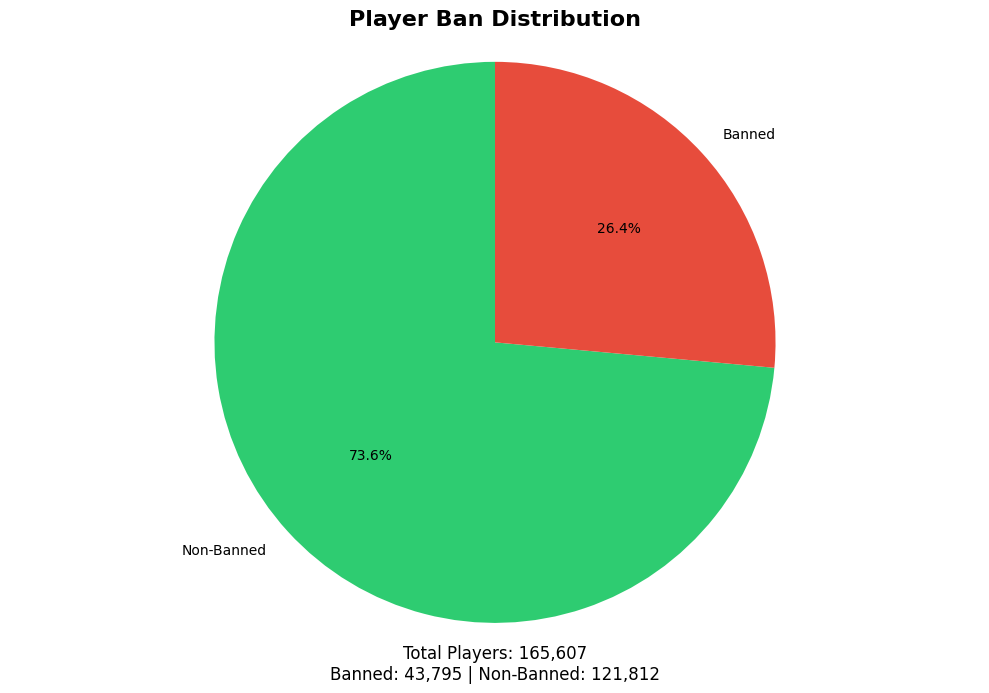

In [100]:
ban_counts = player_data['has_ban'].value_counts()
labels = ['Non-Banned', 'Banned']
false, true = b'\x00', b'\x01'
sizes = [ban_counts.get(false, 0), ban_counts.get(true, 0)]
colors = ['#2ecc71', '#e74c3c']

plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Player Ban Distribution', fontsize=16, weight='bold')

total = sum(sizes)
plt.text(0, -1.2, f'Total Players: {total:,}\nBanned: {sizes[1]:,} | Non-Banned: {sizes[0]:,}'
         ,ha='center', fontsize=12)

plt.axis('equal')
plt.tight_layout()
plt.show()

## Data Quality Checks

In [101]:
# Checks if any columns are missing values
print("--- MISSING VALUES ---")

missing_counts = player_data.isnull().sum()
missing_percent = (missing_counts / len(player_data)) * 100

missing_df = pd.DataFrame({
    'Column': missing_counts.index,
    'Missing Count': missing_counts.values,
    'Missing %': missing_percent.values
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("No missing values found")


--- MISSING VALUES ---
Column  Missing Count  Missing %
  name              8   0.004831


In [102]:
# Checks for duplicate entries
print("--- DUPLICATE RECORDS ---")

duplicate_steam_ids = player_data['steam_id'].duplicated().sum()
print(f"Duplicate Steam Id's: {duplicate_steam_ids:,}")

duplicate_rows = player_data.duplicated().sum()
print(f"Fully duplicate rows: {duplicate_rows:,}")

if duplicate_steam_ids > 0:
    print("Duplicates found")

--- DUPLICATE RECORDS ---
Duplicate Steam Id's: 0
Fully duplicate rows: 0


## Banned vs Non-Banned Players Comparison

In [103]:
df_banned = player_data[player_data['has_ban'] == true]
df_non_banned = player_data[player_data['has_ban'] == false]

numeric_cols = player_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
excluded_cols = ['steam_id', 'created_at', 'updated_at', 'rank_premier', 'rank_faceit_elo' ,'total_matches']
numeric_cols = [col for col in numeric_cols if col not in excluded_cols]

banned_means = df_banned[numeric_cols].mean()
non_banned_means = df_non_banned[numeric_cols].mean()

difference = banned_means - non_banned_means
pct_difference = ((banned_means - non_banned_means) / non_banned_means * 100).fillna(0)

comparison_df = pd.DataFrame({
    'Feature': numeric_cols,
    'Non-Banned Mean': non_banned_means.values,
    'Banned Mean': banned_means.values,
    'Difference': difference.values,
    'Difference %': pct_difference.values
})

# Sort by absolute percentage difference to see most discriminative features
comparison_df['Abs Difference %'] = comparison_df['Difference %'].abs()
comparison_df = comparison_df.sort_values('Abs Difference %', ascending=False)
comparison_df = comparison_df.drop('Abs Difference %', axis=1)

print("--- MEAN BANNED VS NON-BANNED ---")
print(comparison_df.to_string(index=False))

--- MEAN BANNED VS NON-BANNED ---
                           Feature  Non-Banned Mean  Banned Mean  Difference  Difference %
                    rating_opening        -0.001425     0.001043    0.002467   -173.190053
                     rating_clutch         0.107255     0.026483   -0.080772    -75.308078
 t_opening_aggression_success_rate        33.567649    16.957393  -16.610256    -49.482929
  traded_deaths_success_percentage        49.096595    26.622246  -22.474349    -45.775779
             he_friends_damage_avg         0.513948     0.742865    0.228917     44.540935
                rating_positioning        49.853328    28.030669  -21.822659    -43.773726
trade_kill_opportunities_per_round         0.294092     0.166419   -0.127673    -43.412584
    trade_kills_success_percentage        43.335514    25.239049  -18.096465    -41.758972
ct_opening_duel_success_percentage        44.601855    26.066959  -18.534896    -41.556334
 t_opening_duel_success_percentage        40.330442    2

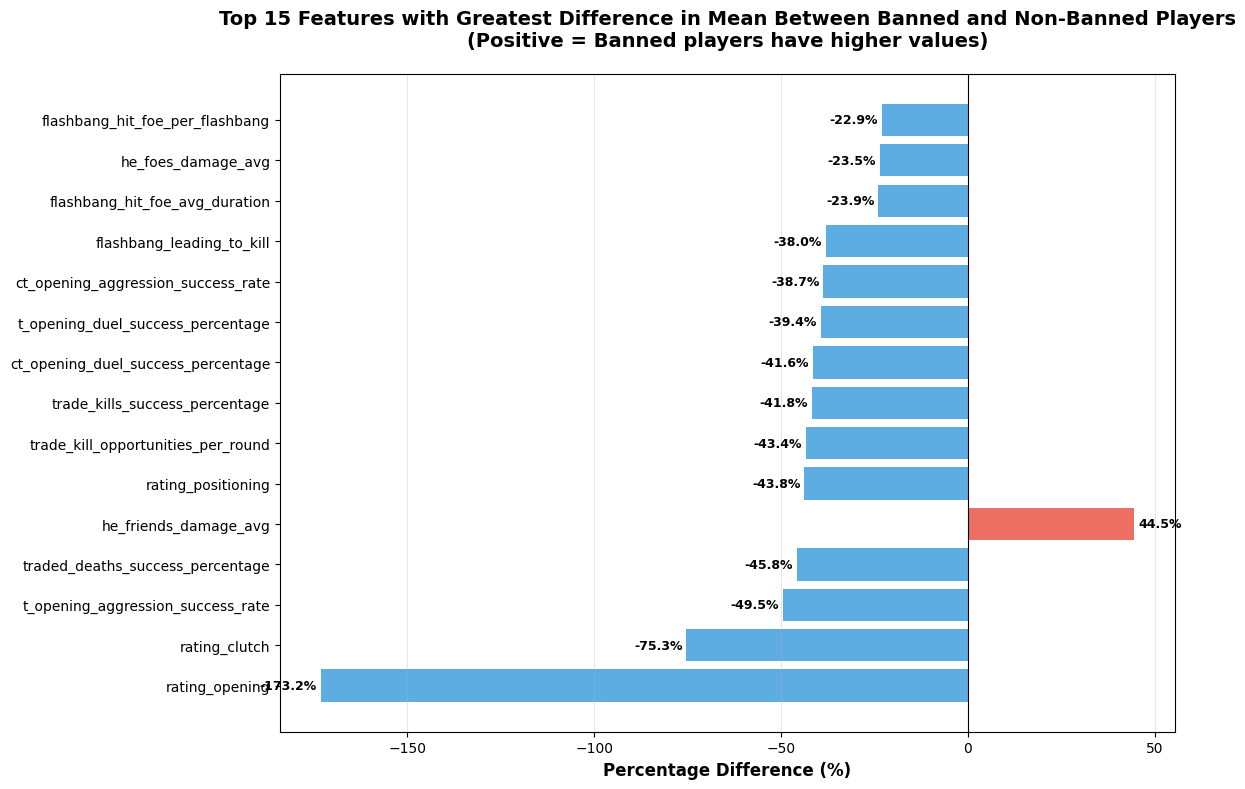

In [104]:

top_features = comparison_df.head(15).copy()

fig, ax = plt.subplots(figsize=(12, 8))

colors = ['#e74c3c' if x > 0 else '#3498db' for x in top_features['Difference %']]
bars = ax.barh(range(len(top_features)), top_features['Difference %'], color=colors, alpha=0.8)

ax.set_yticks(range(len(top_features)))
ax.set_yticklabels(top_features['Feature'], fontsize=10)
ax.set_xlabel('Percentage Difference (%)', fontsize=12, weight='bold')
ax.set_title(f'Top 15 Features with Greatest Difference in Mean Between Banned and Non-Banned Players\n(Positive = Banned players have higher values)',
             fontsize=14, weight='bold', pad=20)
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(axis='x', alpha=0.3)

for i, (bar, val) in enumerate(zip(bars, top_features['Difference %'])):
    ax.text(val + (1 if val > 0 else -1), i, f'{val:.1f}%', 
            va='center', ha='left' if val > 0 else 'right', fontsize=9, weight='bold')

plt.tight_layout()
plt.show()

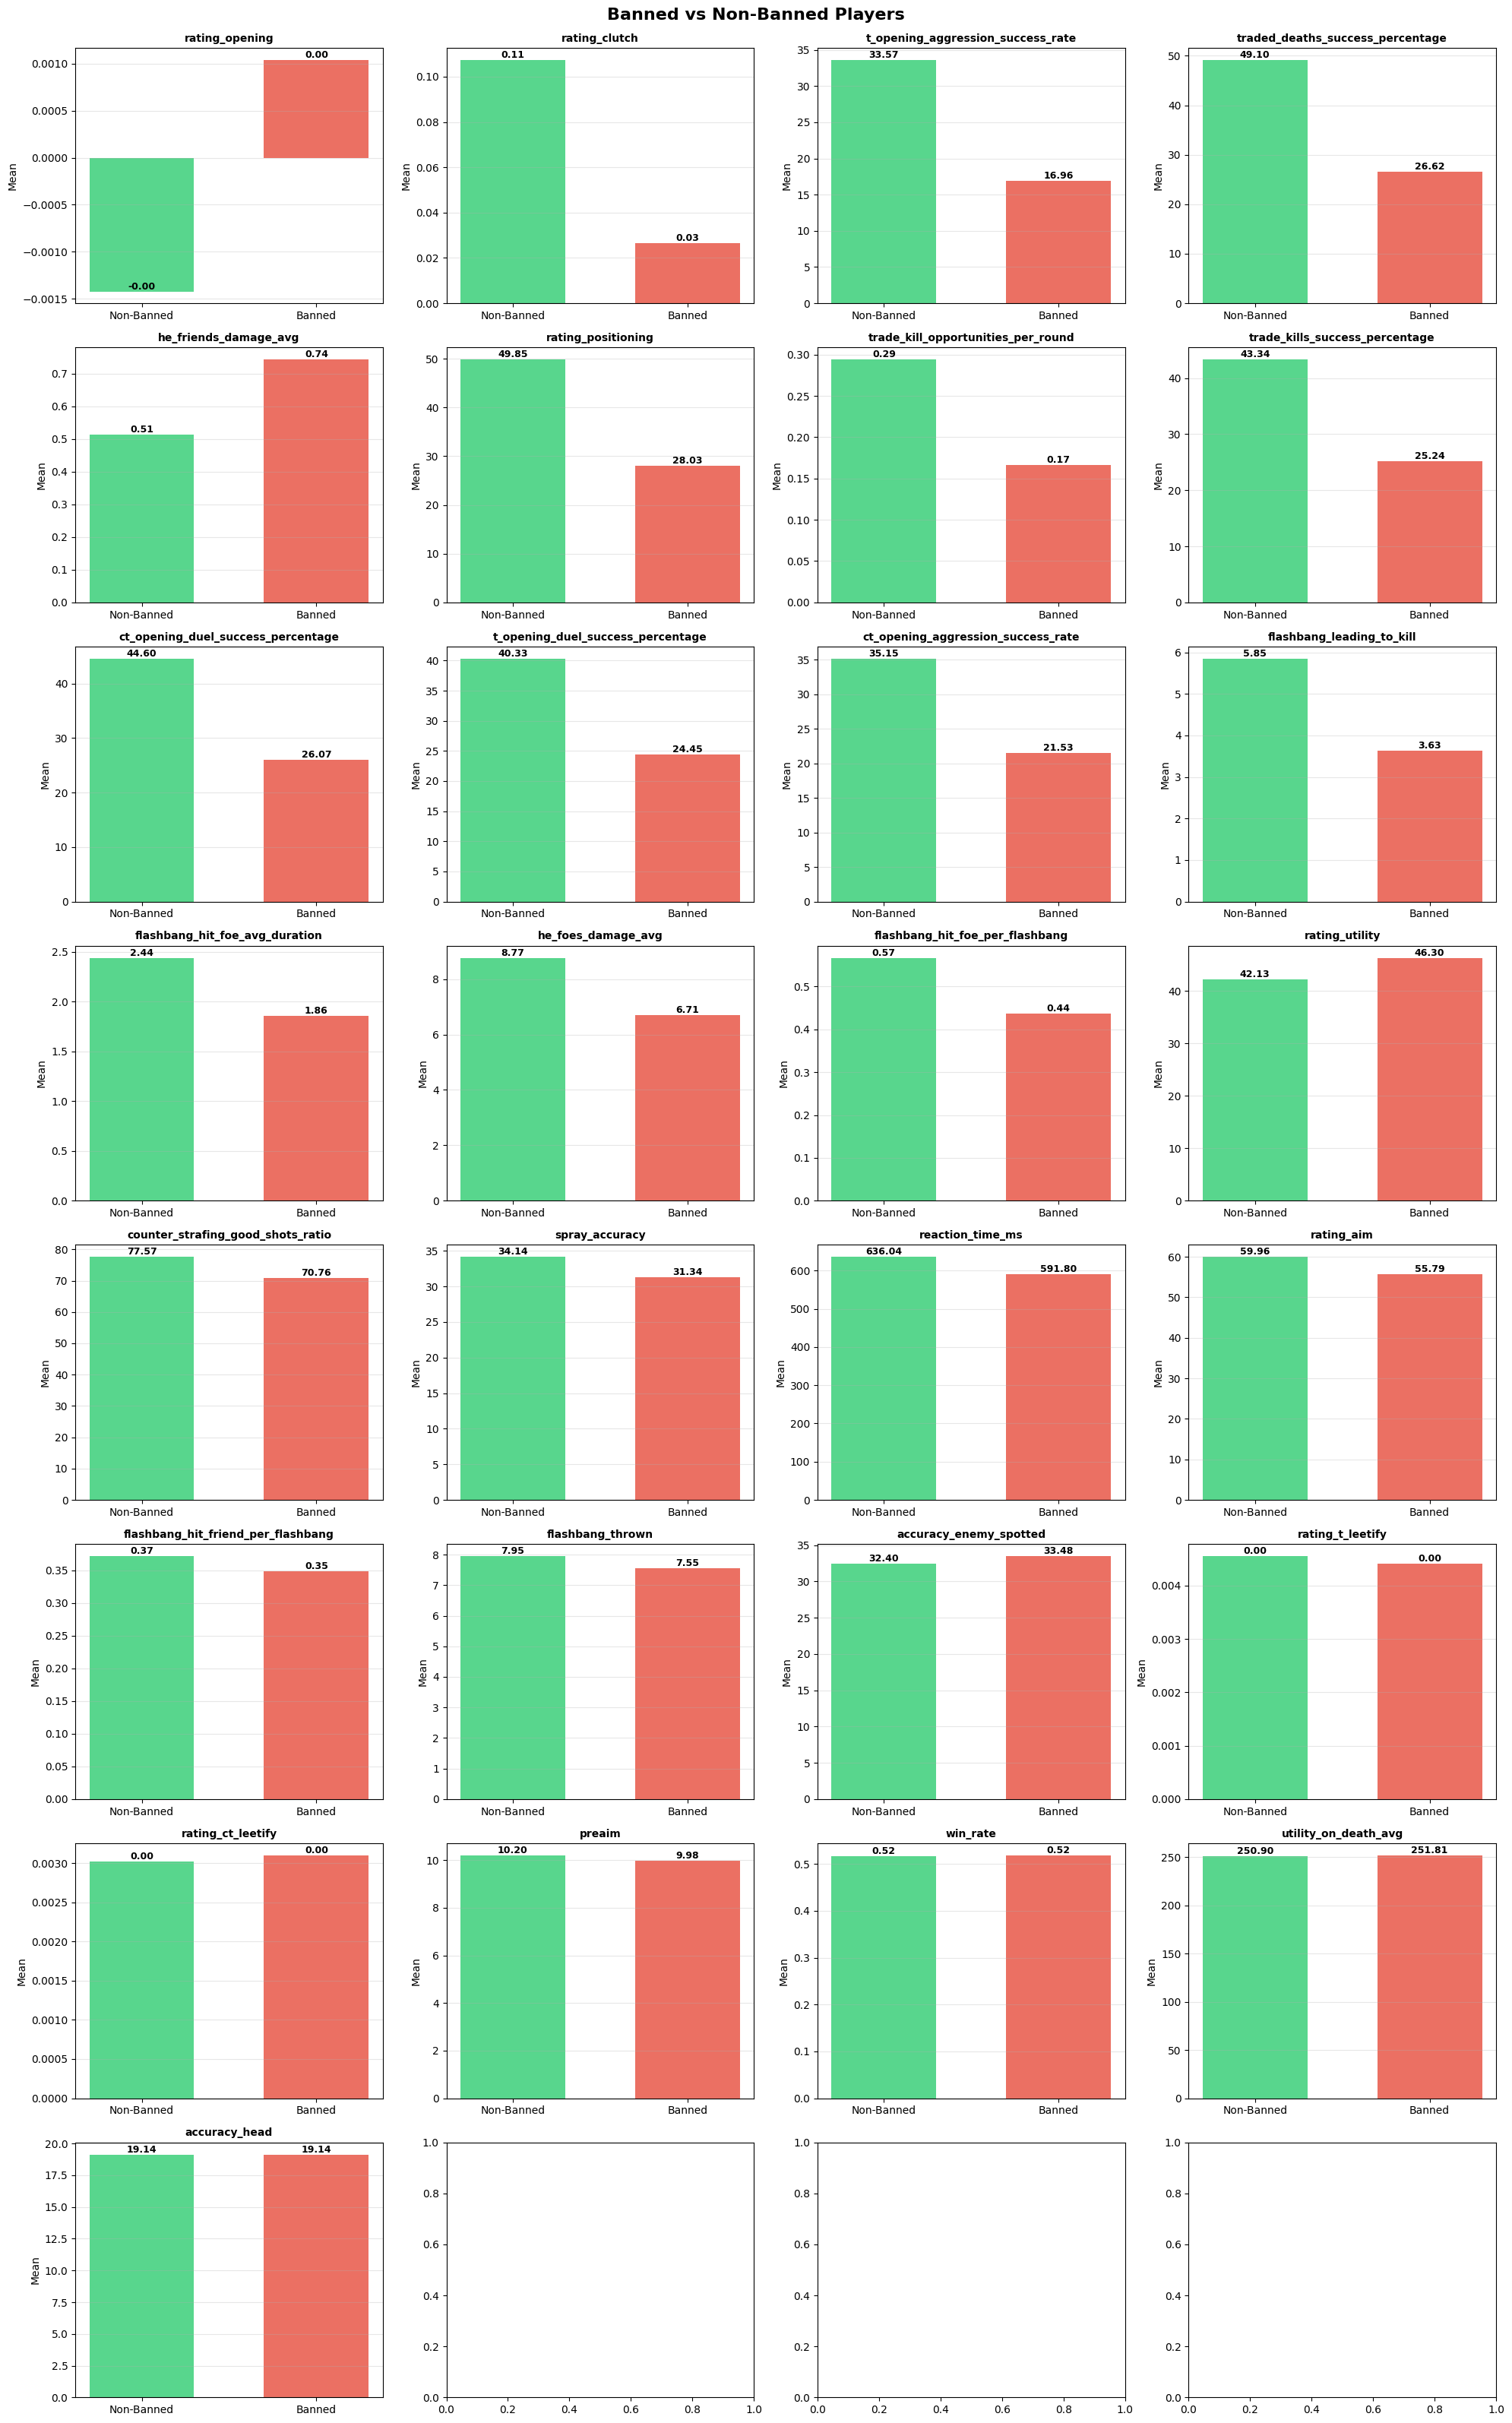

In [105]:
features = comparison_df['Feature'].tolist()

n_features = len(features)
n_cols = 4
n_rows = int(np.ceil(n_features / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for idx, feature in enumerate(features):
    ax = axes[idx]
    
    non_banned_mean = comparison_df[comparison_df['Feature'] == feature]['Non-Banned Mean'].values[0]
    banned_mean = comparison_df[comparison_df['Feature'] == feature]['Banned Mean'].values[0]
    
    bars = ax.bar(['Non-Banned', 'Banned'], [non_banned_mean, banned_mean],
                   color=['#2ecc71', '#e74c3c'], alpha=0.8, width=0.6)
    
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=9, weight='bold')
    
    ax.set_title(feature, fontsize=10, weight='bold')
    ax.set_ylabel('Mean', fontsize=10)
    ax.grid(axis='y', alpha=0.3)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

plt.suptitle('Banned vs Non-Banned Players',
             fontsize=16, weight='bold', y=0.995)
plt.tight_layout()
plt.show()

## Distribution Analysis: Opening Duel Success

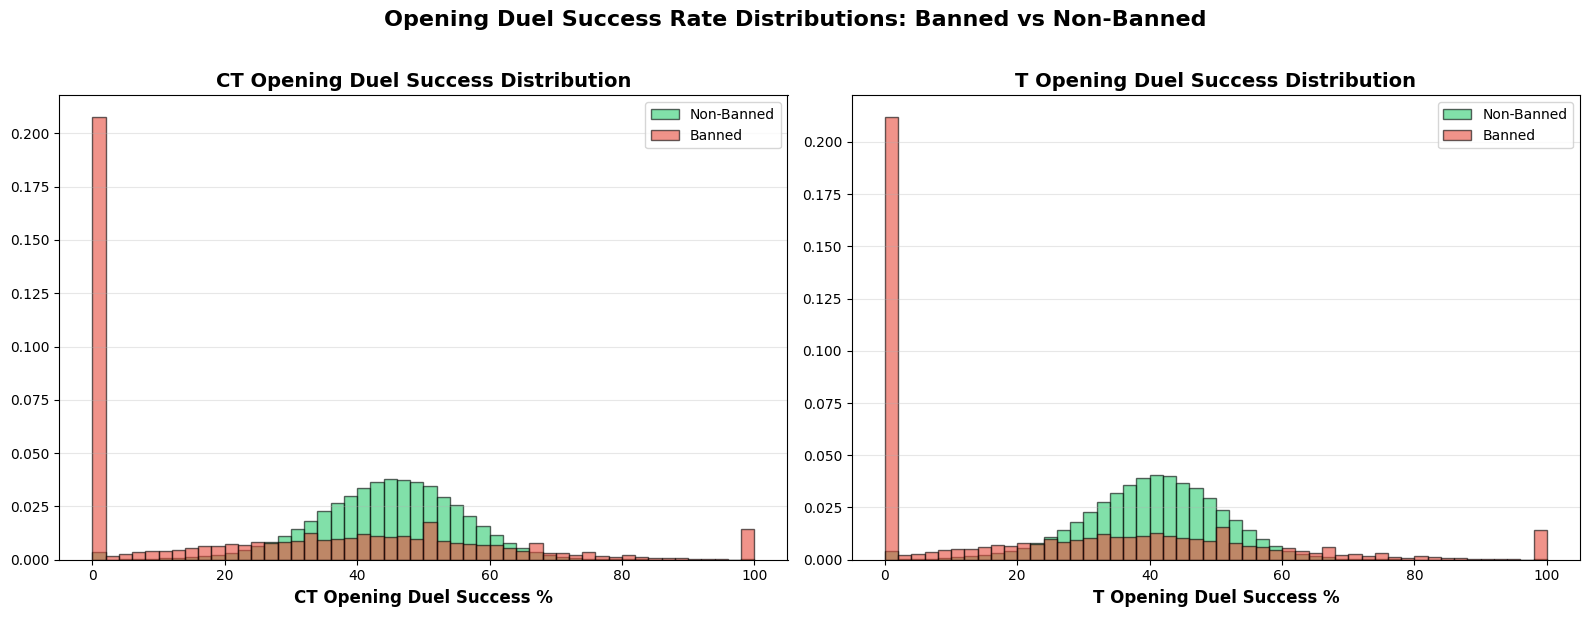

In [106]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ax1 = axes[0]
ax1.hist(df_non_banned['ct_opening_duel_success_percentage'].dropna(), 
         bins=50, alpha=0.6, color='#2ecc71', label='Non-Banned', density=True, edgecolor='black')
ax1.hist(df_banned['ct_opening_duel_success_percentage'].dropna(), 
         bins=50, alpha=0.6, color='#e74c3c', label='Banned', density=True, edgecolor='black')
ax1.set_xlabel('CT Opening Duel Success %', fontsize=12, weight='bold')
ax1.set_title('CT Opening Duel Success Distribution', fontsize=14, weight='bold')
ax1.legend(fontsize=10)
ax1.grid(axis='y', alpha=0.3)

# T Opening Duel Success
ax2 = axes[1]
ax2.hist(df_non_banned['t_opening_duel_success_percentage'].dropna(), 
         bins=50, alpha=0.6, color='#2ecc71', label='Non-Banned', density=True, edgecolor='black')
ax2.hist(df_banned['t_opening_duel_success_percentage'].dropna(), 
         bins=50, alpha=0.6, color='#e74c3c', label='Banned', density=True, edgecolor='black')
ax2.set_xlabel('T Opening Duel Success %', fontsize=12, weight='bold')
ax2.set_title('T Opening Duel Success Distribution', fontsize=14, weight='bold')
ax2.legend(fontsize=10)
ax2.grid(axis='y', alpha=0.3)

plt.suptitle('Opening Duel Success Rate Distributions: Banned vs Non-Banned', 
             fontsize=16, weight='bold', y=1.02)
plt.tight_layout()
plt.show()

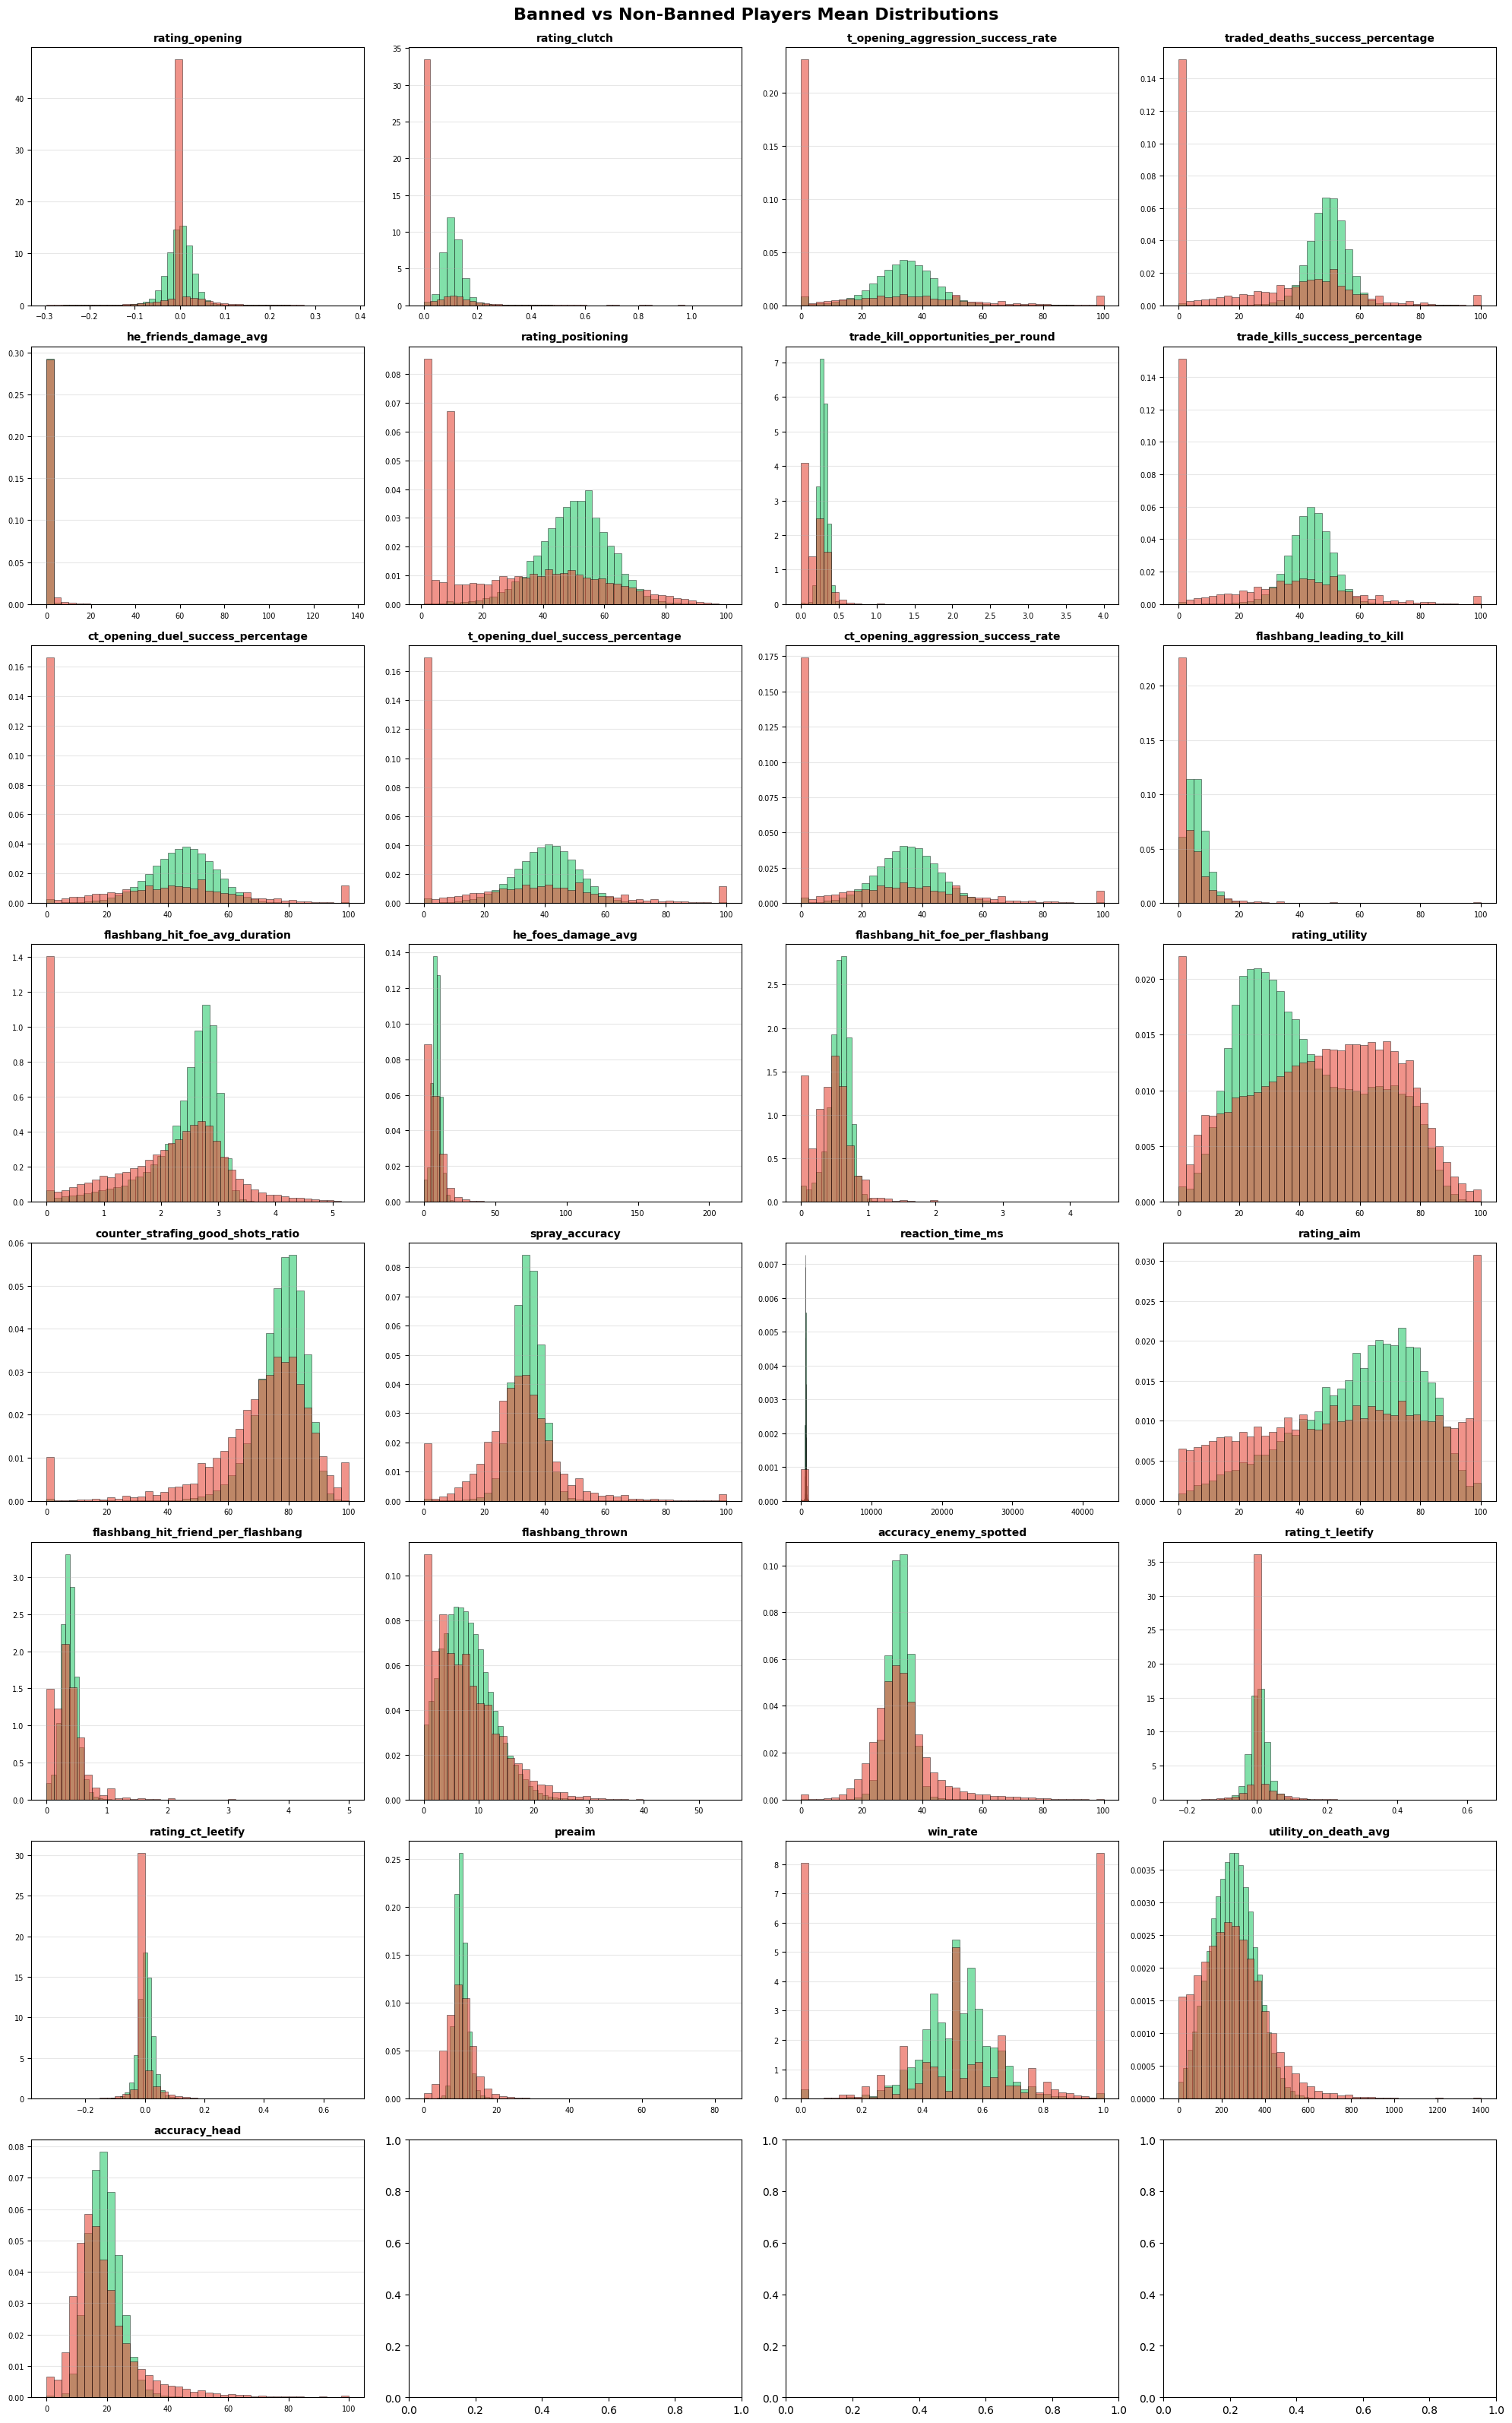

In [107]:
# Distribution plots for all features
features = comparison_df['Feature'].tolist()

n_features = len(features)
n_cols = 4
n_rows = int(np.ceil(n_features / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for idx, feature in enumerate(features):
    ax = axes[idx]
    
    non_banned_data = df_non_banned[feature].dropna()
    banned_data = df_banned[feature].dropna()
    
    ax.hist(non_banned_data, bins=40, alpha=0.6, color='#2ecc71',
            label='Non-Banned', density=True, edgecolor='black', linewidth=0.5)
    ax.hist(banned_data, bins=40, alpha=0.6, color='#e74c3c', 
            label='Banned', density=True, edgecolor='black', linewidth=0.5)

    ax.set_title(feature, fontsize=10, weight='bold')
    ax.grid(axis='y', alpha=0.3)
    ax.tick_params(axis='both', labelsize=7)

plt.suptitle('Banned vs Non-Banned Players Mean Distributions', fontsize=16, weight='bold', y=0.995)
plt.tight_layout()
plt.show()

## Zero/Null Value Analysis

In [108]:
features = comparison_df['Feature'].tolist()

zero_analysis = []
for feature in features:
    non_banned_zeros = (df_non_banned[feature] == 0).sum()
    banned_zeros = (df_banned[feature] == 0).sum()
    
    non_banned_zero_pct = (non_banned_zeros / len(df_non_banned)) * 100
    banned_zero_pct = (banned_zeros / len(df_banned)) * 100
    difference = banned_zero_pct - non_banned_zero_pct
    
    zero_analysis.append({
        'Feature': feature,
        'Non-Banned Zero %': non_banned_zero_pct,
        'Banned Zero %': banned_zero_pct,
        'Difference': difference
    })

zero_df = pd.DataFrame(zero_analysis)
zero_df = zero_df.sort_values('Difference', ascending=False)

print("--- FEATURES WITH DISPROPORTIONATE ZERO VALUES ---")
print("\nFeatures where banned players have significantly MORE zero values:")
high_zeros = zero_df[zero_df['Difference'] > 5]  # More than 5% difference
if len(high_zeros) > 0:
    print(high_zeros.to_string(index=False))
else:
    print("No features found")

print("\nAll features sorted by difference:")
print(zero_df.to_string(index=False))

--- FEATURES WITH DISPROPORTIONATE ZERO VALUES ---

Features where banned players have significantly MORE zero values:
                           Feature  Non-Banned Zero %  Banned Zero %  Difference
                     rating_clutch           0.673168      79.817331   79.144162
                    rating_opening           0.458904      76.750771   76.291867
                 rating_ct_leetify           0.417857      68.695057   68.277199
                  rating_t_leetify           0.412931      68.633406   68.220474
 t_opening_aggression_success_rate           2.008012      57.716634   55.708622
             he_friends_damage_avg           4.075132      52.268524   48.193392
         flashbang_leading_to_kill           4.678521      47.286220   42.607699
ct_opening_aggression_success_rate           0.880045      43.246946   42.366901
 t_opening_duel_success_percentage           0.795488      42.214865   41.419377
ct_opening_duel_success_percentage           0.692871      41.344902   

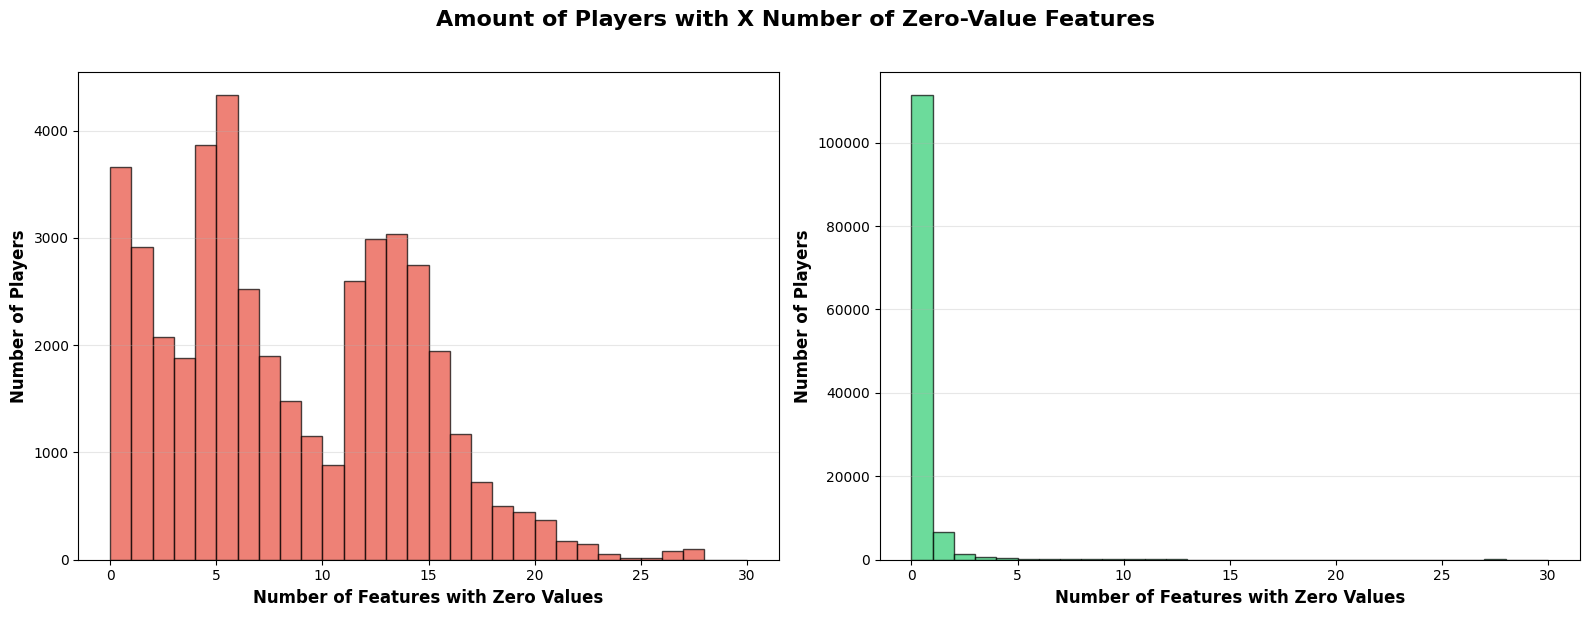

In [109]:
# Count how many zero-value features each player has
features = comparison_df['Feature'].tolist()

banned_zero_counts = (df_banned[features] == 0).sum(axis=1)
non_banned_zero_counts = (df_non_banned[features] == 0).sum(axis=1)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ax1 = axes[0]
ax1.hist(banned_zero_counts, bins=range(0, len(features) + 2), 
         color='#e74c3c', alpha=0.7, edgecolor='black', linewidth=1)
ax1.set_xlabel('Number of Features with Zero Values', fontsize=12, weight='bold')
ax1.set_ylabel('Number of Players', fontsize=12, weight='bold')
ax1.grid(axis='y', alpha=0.3)

ax2 = axes[1]
ax2.hist(non_banned_zero_counts, bins=range(0, len(features) + 2), 
         color='#2ecc71', alpha=0.7, edgecolor='black', linewidth=1)
ax2.set_xlabel('Number of Features with Zero Values', fontsize=12, weight='bold')
ax2.set_ylabel('Number of Players', fontsize=12, weight='bold')
ax2.grid(axis='y', alpha=0.3)

plt.suptitle('Amount of Players with X Number of Zero-Value Features',
             fontsize=16, weight='bold', y=1.02)
plt.tight_layout()
plt.show()

## ⚠️ Data Quality Issues

### Problem 1: Banned Player Data Expiration
**Issue:** Banned players show disproportionately poor statistics and high zero-value counts.

**Root Cause:**
- Leetify API only retains player data for **30 days**
- Data collection process:
  1. Retrieve Steam IDs of banned players from VAClist
  2. Fetch player profiles from Leetify API
- By the time banned players are fetched from Leetify, their data has often **expired or been deleted**
- This results in incomplete/missing statistics for banned players

**Impact:**
- Banned players appear to have worse performance than non-banned players (opposite of expected)
- High concentration of zero values in banned player data
- Unreliable features for ML model training

---

### Problem 2: Partial Zero Values from API Evolution
**Issue:** Some player entries have zero values for certain features but not all.

**Root Cause:**
- Leetify API has added new data points/features over time
- Players who haven't played recently don't have data for newer features
- Older profiles are missing statistics that didn't exist when they last played

**Impact:**
- Inconsistent feature availability across player profiles
- Partial zero values that don't indicate missing data, but rather "data not collected yet"
- Creates noise in the dataset

---

### Recommendations:
1. **Filter out players with too few matches** (e.g., < 50 total_matches)
2. **Remove entries with excessive zero values** (e.g., > 30% of features are zero)
3. **'Guess' missing values** based on similar player profiles or use imputation techniques

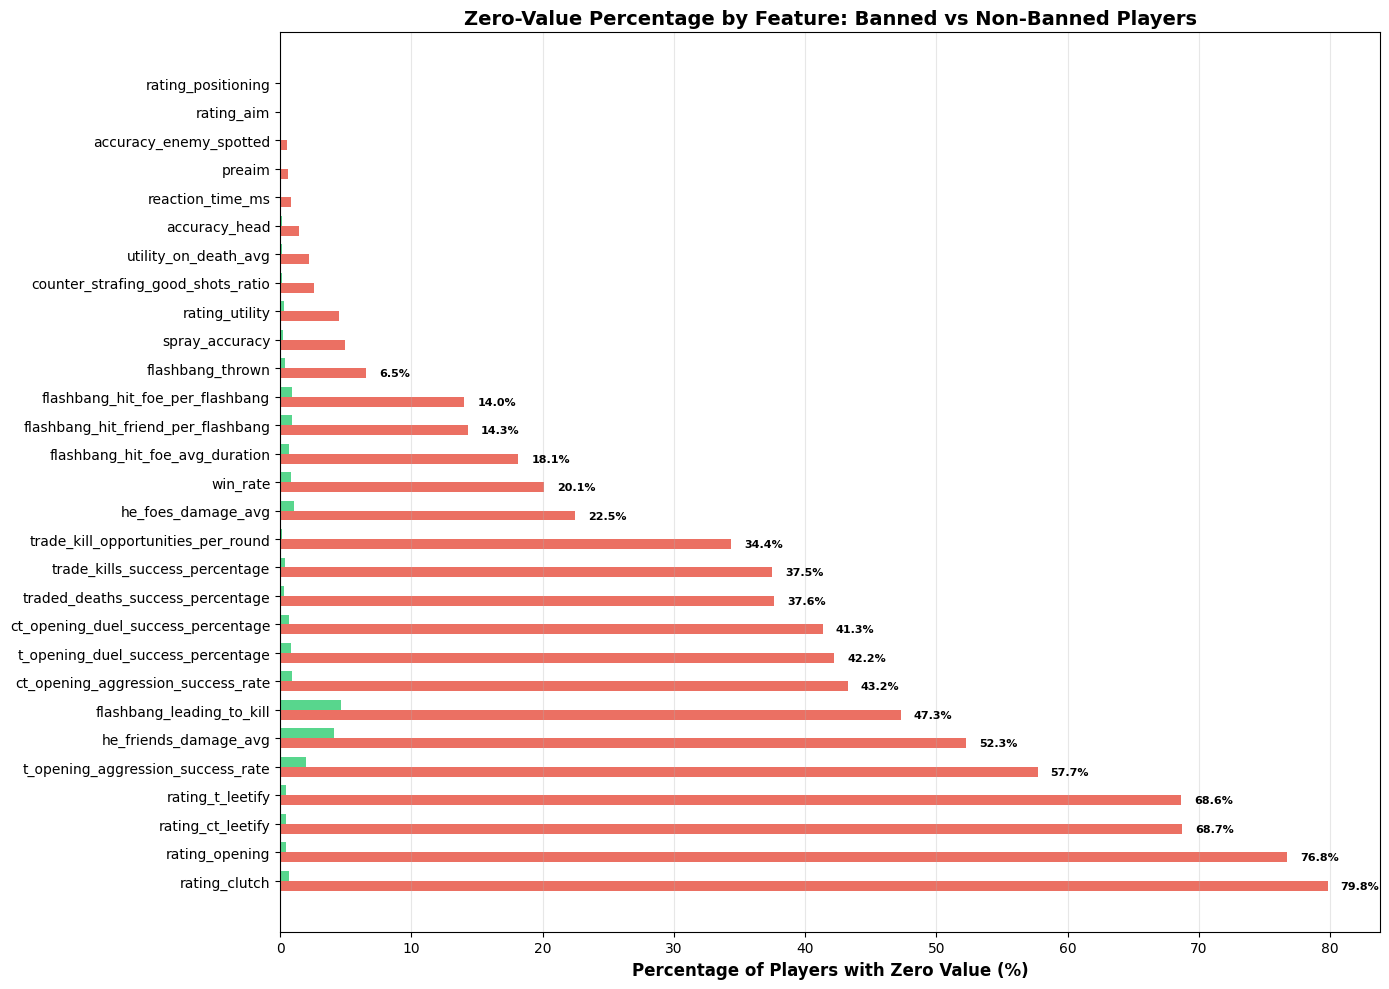

In [110]:
features = comparison_df['Feature'].tolist()

banned_zero_pcts = []
non_banned_zero_pcts = []

for feature in features:
    banned_zeros = (df_banned[feature] == 0).sum()
    non_banned_zeros = (df_non_banned[feature] == 0).sum()

    banned_zero_pcts.append((banned_zeros / len(df_banned)) * 100)
    non_banned_zero_pcts.append((non_banned_zeros / len(df_non_banned)) * 100)

sorted_indices = sorted(range(len(banned_zero_pcts)), key=lambda i: banned_zero_pcts[i], reverse=True)
sorted_features = [features[i] for i in sorted_indices]
sorted_banned_pcts = [banned_zero_pcts[i] for i in sorted_indices]
sorted_non_banned_pcts = [non_banned_zero_pcts[i] for i in sorted_indices]

fig, ax = plt.subplots(figsize=(14, 10))
y_pos = range(len(sorted_features))
width = 0.35

bars_banned = ax.barh([i - width/2 for i in y_pos], sorted_banned_pcts, width,
                       label='Banned Players', color='#e74c3c', alpha=0.8)
bars_non_banned = ax.barh([i + width/2 for i in y_pos], sorted_non_banned_pcts, width,
                           label='Non-Banned Players', color='#2ecc71', alpha=0.8)

for i, (banned_pct, non_banned_pct) in enumerate(zip(sorted_banned_pcts, sorted_non_banned_pcts)):
    if banned_pct > 5:  # Only show label if > 5%
        ax.text(banned_pct + 1, i - width/2, f'{banned_pct:.1f}%',
                va='center', fontsize=8, weight='bold')

ax.set_yticks(y_pos)
ax.set_yticklabels(sorted_features, fontsize=10)
ax.set_xlabel('Percentage of Players with Zero Value (%)', fontsize=12, weight='bold')
ax.set_title('Zero-Value Percentage by Feature: Banned vs Non-Banned Players',fontsize=14, weight='bold')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()